# Medical Cost Personal Insurance Project__2024_final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


imported required data

In [3]:
df.shape

(1338, 7)

dataset contains 1338 rows and 7 columns.in which 6 columns are input variables and 1 is output variable. charges columns is dependent variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


all columns conatins same number of values and there is no null values

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

dataset contains 3 types of datatypes (int64, float64, object) and all are in correct format so there is no issue

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no null values present in our dataset

In [7]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

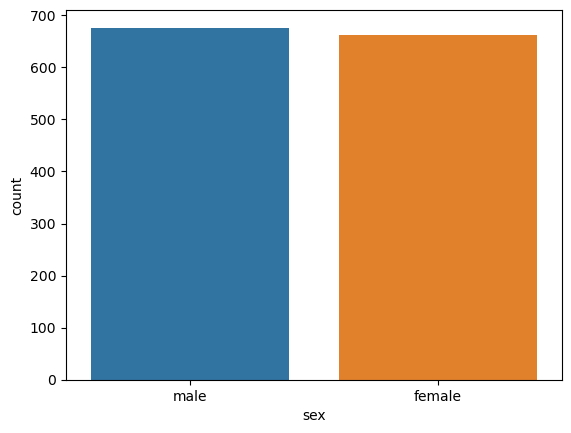

In [8]:
sns.barplot(x=df['sex'].value_counts().index,y=df['sex'].value_counts())

there is no significant difference between male and female

In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

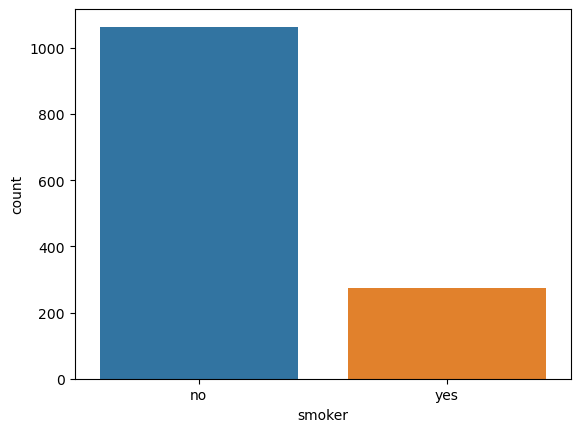

In [10]:
sns.barplot(x=df['smoker'].value_counts().index,y=df['smoker'].value_counts())

there is a lot of difference between smoker and nonsmoker values

In [11]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

southeast region is slightly higher than the other 3 regions

In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
df[(df['age']==19) &( df['sex']=='male') &( df['bmi']==30.59) &( df['children']==0) & (df['smoker']=='no')& (df['region']=='northwest')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


dataset contains 1 duplicate value so we need to remove that

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df[(df['age']==19) &( df['sex']=='male') &( df['bmi']==30.59) &( df['children']==0) & (df['smoker']=='no')& (df['region']=='northwest')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1 row has been removed from the dataset so our new dataset should contain 1337 rows

# converting categorical data into numerical data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['sex']=le.fit_transform(df.sex)

In [23]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


0 for Female , 1 for Male

In [24]:
df['smoker']=le.fit_transform(df.smoker)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


0 for non-smoker , 1 for smoker

In [26]:
df['region']=le.fit_transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


0 for north east ,1 for north west,2 for south east, 3 for south west

In [27]:
# data has been converted into numerical

as per problem statement bmi normal range is 18.5 to 24.9, if it is below 18.5 considered as low body weight, above 24.9 considered as high body weight

categorized the bmi data.

arr=[]

for i in df['bmi']:
    if i>24.9:
        arr.append(2)
    elif i<18.5:
        arr.append(0)
    else:
        arr.append(1)

df['bmi']=np.array(arr)            



categorized the bmi data into 3 parts but not recieved good result.

# that is why not going to categorize the bmi data.

 0- lower body weight, 1- normal body weight,2-higher body weight



In [28]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [29]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

as per observation there is no significant difference between the mean and median for all columns.

age ,bmi and charges are slightly rightly skewed.

in charges columns there is significant difference between 75th percentile and maximum values so there maybe chances of outliers are present.

also standard deviation for charges is also very high that means data is highly spreaded.

# we are not going to remove skewness and outliers from output variable and categorical data

identifying outliers

age            Axes(0.125,0.53;0.110714x0.35)
sex         Axes(0.257857,0.53;0.110714x0.35)
bmi         Axes(0.390714,0.53;0.110714x0.35)
children    Axes(0.523571,0.53;0.110714x0.35)
smoker      Axes(0.656429,0.53;0.110714x0.35)
region      Axes(0.789286,0.53;0.110714x0.35)
charges        Axes(0.125,0.11;0.110714x0.35)
dtype: object

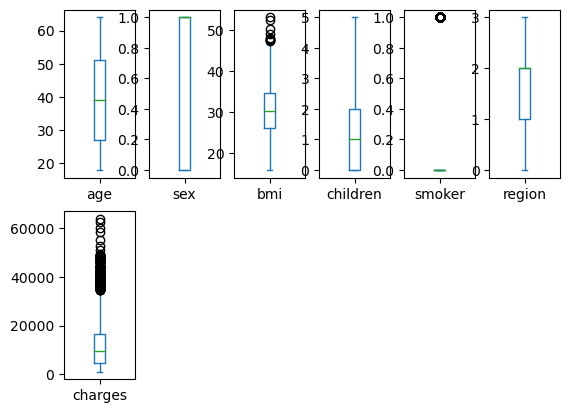

In [30]:
df.plot(kind='box',subplots=True,layout=(2,6))

from above graph we can identify some outliers are present in bmi and charges

In [31]:
# calculating z score
z=np.abs(zscore(df))

In [32]:
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [33]:
df=df[(z<3).all(axis=1)]  # only considering the data which is below 3 z-score

In [34]:
df.shape

(1308, 7)

new dataset contains 1308 rows and 7 columns

In [35]:
df.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

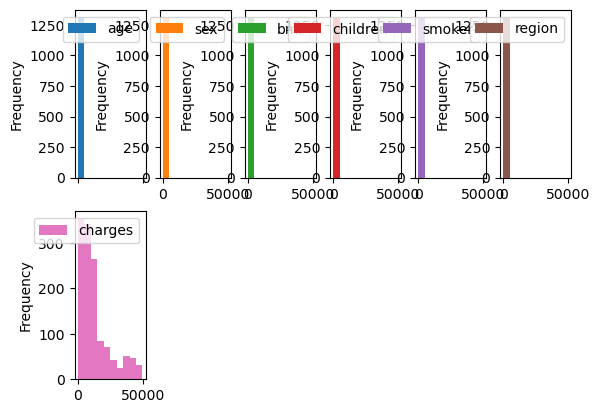

In [36]:
df.plot(kind='hist',subplots=True,layout=(2,6))

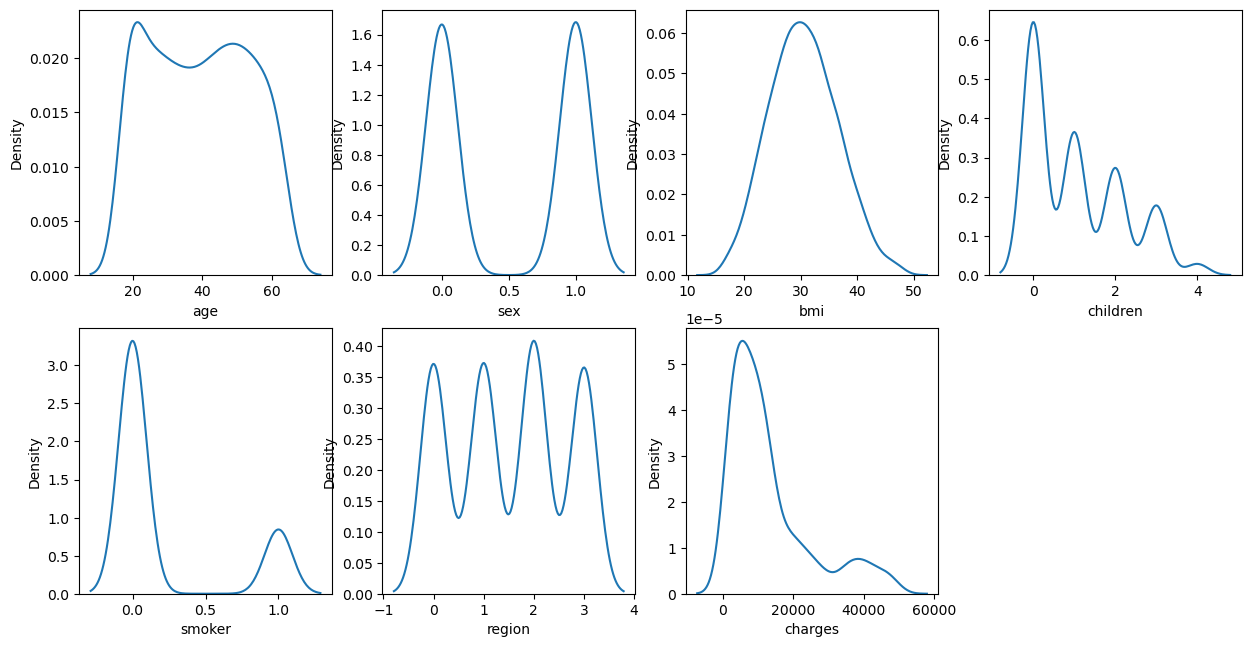

In [37]:
plt.figure(figsize=(15,20))
a=1
for i in df:
    if a<10:
        plt.subplot(5,4,a)
        sns.kdeplot(df[i])
        plt.xlabel(i)
    a=a+1
plt.show()

we are not going to remove skewness for categorical data.. and for numerical data all are in within range

In [38]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018180,0.118272,0.058142,-0.029671,0.002619,0.304541
sex,-0.018180,1.000000,0.042514,0.014774,0.079479,0.003434,0.060242
bmi,0.118272,0.042514,1.000000,0.029927,-0.005289,0.160139,0.191523
children,0.058142,0.014774,0.029927,1.000000,0.028498,-0.003303,0.099814
smoker,-0.029671,0.079479,-0.005289,0.028498,1.000000,-0.003651,0.785115
region,0.002619,0.003434,0.160139,-0.003303,-0.003651,1.000000,-0.007978
charges,0.304541,0.060242,0.191523,0.099814,0.785115,-0.007978,1.000000


finding out correlation between the variables

<Axes: xlabel='age', ylabel='charges'>

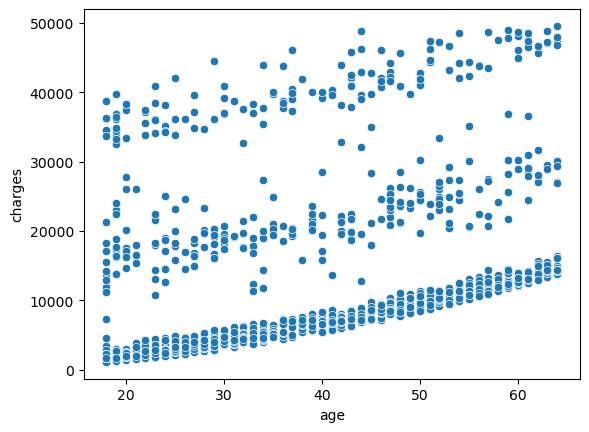

In [39]:
sns.scatterplot(x='age',y='charges',data=df)

<Axes: xlabel='bmi', ylabel='charges'>

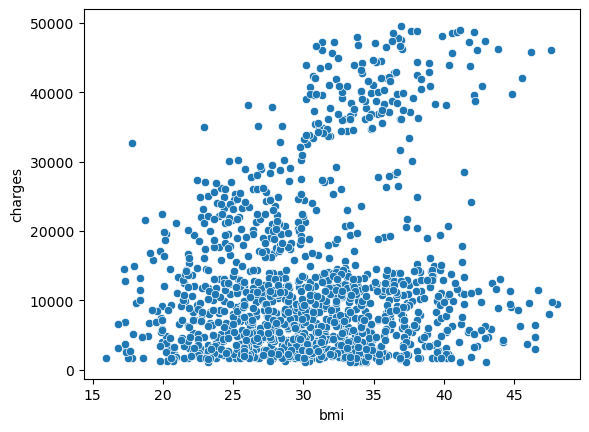

In [40]:
sns.scatterplot(x='bmi',y='charges',data=df)

<Axes: >

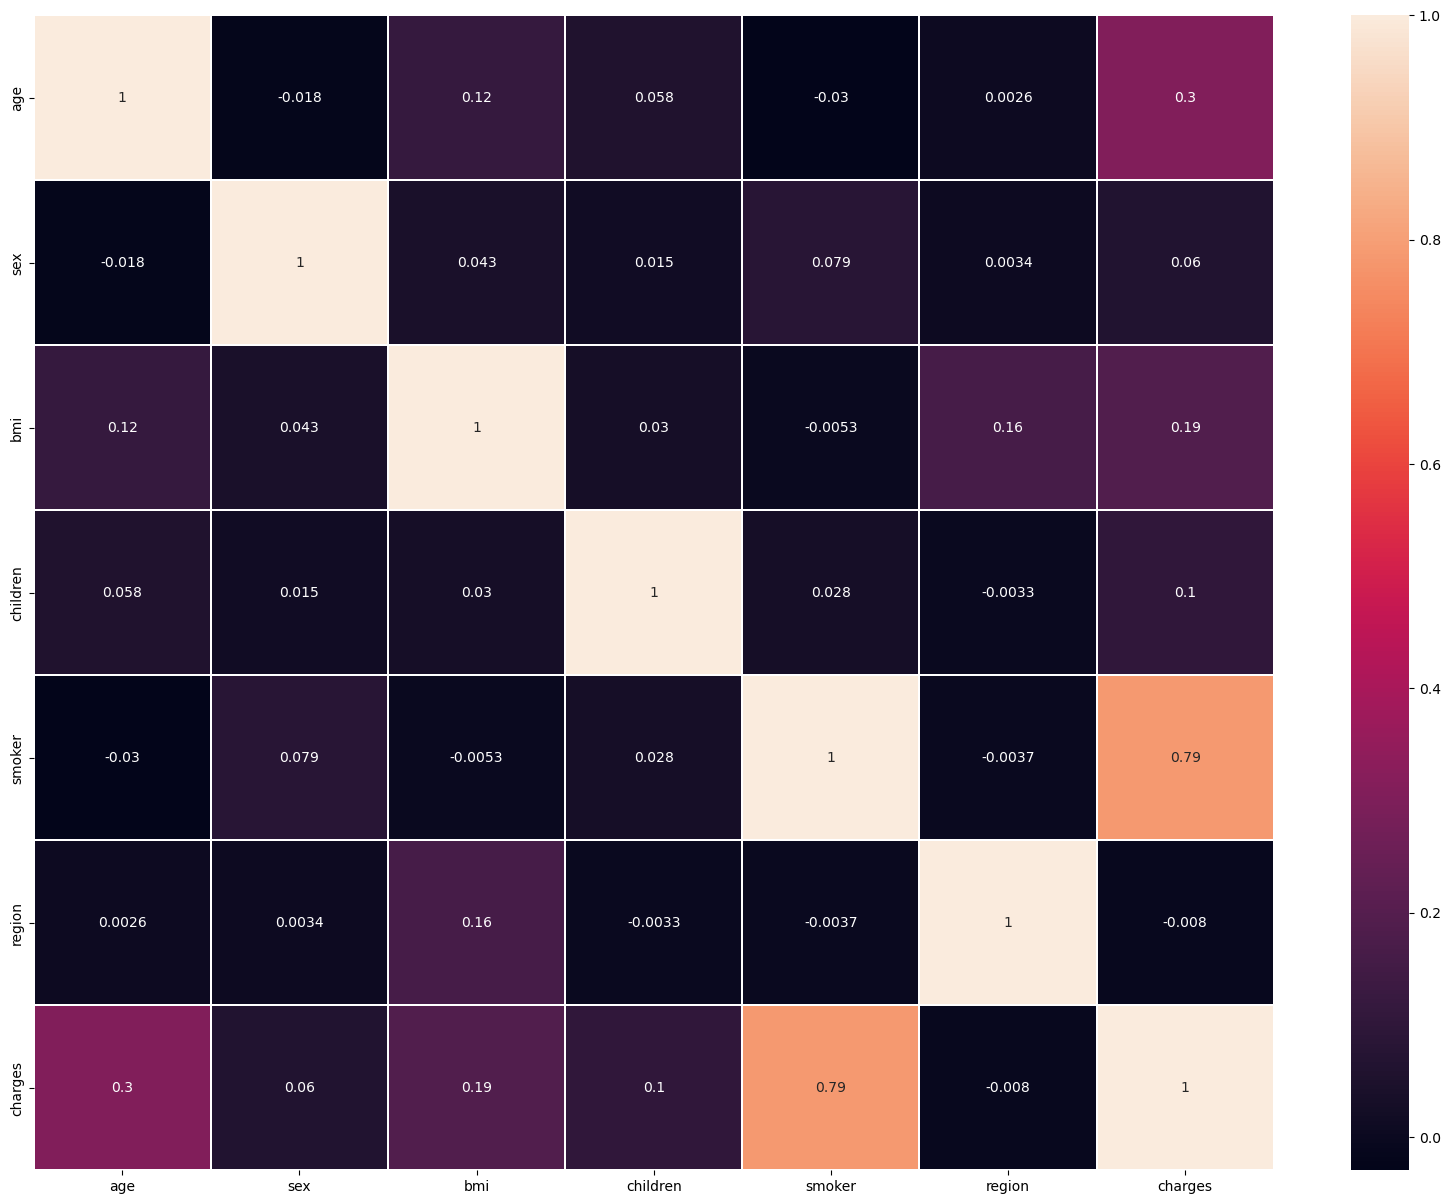

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

smoker is highly correlated with the output variable..

other variables are less correlated with output variable.

input variables are less correlated with each other

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


dividing the data into 2 parts

In [43]:
from sklearn.preprocessing import StandardScaler

when i standarized only input variables i got very high mean_squared_error and other metrics .so standardizing all the columns  

In [44]:
st=StandardScaler()

In [45]:
df=pd.DataFrame(st.fit_transform(df),columns=df.columns)
df

,age,sex,bmi,children,smoker,region,charges
0,-1.440754,-1.004598,-0.449186,-0.930279,1.983897,1.351994,0.322702
1,-1.511806,0.995423,0.533188,-0.040802,-0.504058,0.446975,-0.969228
2,-0.801288,0.995423,0.404324,1.738153,-0.504058,0.446975,-0.737088
3,-0.446029,0.995423,-1.318596,-0.930279,-0.504058,-0.458045,0.757301
4,-0.517081,0.995423,-0.285179,-0.930279,-0.504058,-0.458045,-0.786740
...,...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.738153,-0.504058,-0.458045,-0.212873
1304,-1.511806,-1.004598,0.223581,-0.930279,-0.504058,-1.363065,-0.928285
1305,-1.511806,-1.004598,1.048641,-0.930279,-0.504058,0.446975,-0.977386
1306,-1.298651,-1.004598,-0.800632,-0.930279,-0.504058,1.351994,-0.945162


dividing the data into 2 parts x and y

In [46]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

# Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
l=LinearRegression()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(915, 6)
(915,)
(393, 6)
(393,)


In [50]:
l.fit(x_train,y_train)

LinearRegression()

In [51]:
pred=l.predict(x_test)

In [52]:
print(r2_score(y_test,pred))

0.7839469823172759


In [53]:
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)

In [54]:
print(mae)
print(mse)
print(rmse)

0.3421035304632818
0.21996313755646765
0.4690022788393119


In [55]:
from sklearn.model_selection import cross_val_score as cv

In [56]:
cvs=cv(l,x,y)

In [57]:
acc=r2_score(y_test,pred)*100
acc

78.39469823172759

In [58]:
val=acc-(cvs.mean())*100
val

3.3388916065292875

In [59]:
cvscore=cvs.mean()*100
cvscore

75.0558066251983

# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor()

In [62]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
pred1=rf.predict(x_test)

In [64]:
acc1=r2_score(y_test,pred1)*100
acc1

86.65894426956962

In [65]:
cvs1=cv(rf,x,y)

In [66]:
cvscore1=cvs1.mean()*100
cvscore1

83.54765634505415

In [67]:
val1=acc1-cvscore1
val1

3.111287924515466

In [68]:
mae1=mean_absolute_error(y_test,pred1)
mse1=mean_squared_error(y_test,pred1)
rmse1=np.sqrt(mse1)

In [69]:
print(mae1)
print(mse1)
print(rmse1)

0.221855127095528
0.13582501685260237
0.368544457091139


# Extra Tree Regressor

In [70]:
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
ext=ExtraTreesRegressor()

In [72]:
ext.fit(x_train,y_train)

ExtraTreesRegressor()

In [73]:
pred2=ext.predict(x_test)

In [74]:
acc2=r2_score(y_test,pred2)*100
acc2

86.4235995154177

In [75]:
cvs2=cv(ext,x,y)                 # calculating cross value score 

In [76]:
cvscore2=cvs2.mean()*100
cvscore2

81.66312904529839

In [77]:
val2=acc2-cvscore2
val2

4.760470470119316

In [78]:
mae2=mean_absolute_error(y_test,pred2)
mse2=mean_squared_error(y_test,pred2)
rmse2=np.sqrt(mse2)

In [79]:
print(mae2)
print(mse2)
print(rmse2)

0.20644706051609607
0.13822105700450293
0.3717809260902218


# Kneighbors Regressor

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [81]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
pred3=knn.predict(x_test)

In [83]:
acc3=r2_score(y_test,pred3)*100
acc3

84.04838067161309

In [84]:
cvs3=cv(knn,x,y)                 # calculating cross value score 

In [85]:
cvscore3=cvs3.mean()*100
cvscore3

80.9719097279431

In [86]:
val3=acc3-cvscore3
val3

3.076470943669989

In [87]:
mae3=mean_absolute_error(y_test,pred3)
mse3=mean_squared_error(y_test,pred3)
rmse3=np.sqrt(mse3)

In [88]:
print(mae3)
print(mse3)
print(rmse3)

0.2606242622365005
0.1624031117089528
0.4029926943617623


# Support Vector Regressor

In [89]:
from sklearn.svm import SVR
svm=SVR()

In [90]:
svm.fit(x_train,y_train)

SVR()

In [91]:
pred4=svm.predict(x_test)

In [92]:
acc4=r2_score(y_test,pred4)*100
acc4

88.11936449631958

In [93]:
cvs4=cv(svm,x,y)             # calculating cross value score 

In [94]:
cvscore4=cvs4.mean()*100
cvscore4

84.13683793159018

In [95]:
val4=acc4-cvscore4
val4

3.9825265647293975

In [96]:
mae4=mean_absolute_error(y_test,pred4)
mse4=mean_squared_error(y_test,pred4)
rmse4=np.sqrt(mse4)

In [97]:
print(mae4)
print(mse4)
print(rmse4)

0.1988987182316921
0.12095650824891369
0.34778802200322206


# GradientBoost Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [99]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [100]:
pred5=gbr.predict(x_test)

In [101]:
acc5=r2_score(y_test,pred5)*100
acc5

89.68318227696982

In [102]:
cvs5=cv(gbr,x,y)             # calculating cross value score 

In [103]:
cvscore5=cvs5.mean()*100
cvscore5

85.49338322524565

In [104]:
val5=acc5-cvscore5
val5

4.189799051724165

In [105]:
mae5=mean_absolute_error(y_test,pred5)
mse5=mean_squared_error(y_test,pred5)
rmse5=np.sqrt(mse5)

In [106]:
print(mae5)
print(mse5)
print(rmse5)

0.19479030769751518
0.10503531125348167
0.3240915167872829


# AdaBoosting Classifier

In [107]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [108]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [109]:
pred6=abr.predict(x_test)

In [110]:
acc6=r2_score(y_test,pred6)*100
acc6

86.17754098967983

In [111]:
cvs6=cv(abr,x,y)             # calculating cross value score 

In [112]:
cvscore6=cvs6.mean()*100
cvscore6

81.36810588066791

In [113]:
val6=acc6-cvscore6
val6

4.809435109011915

In [114]:
mae6=mean_absolute_error(y_test,pred6)
mse6=mean_squared_error(y_test,pred6)
rmse6=np.sqrt(mse6)

In [115]:
print(mae6)
print(mse6)
print(rmse6)

0.3084440601332584
0.14072617384685618
0.375134874207739


# Ridge Regressor

In [116]:
from sklearn.linear_model import Ridge

In [117]:
rdg=Ridge()

In [118]:
rdg.fit(x_train,y_train)

Ridge()

In [119]:
pred7=rdg.predict(x_test)

In [120]:
acc7=r2_score(y_test,pred7)*100
acc7

78.39020484674504

In [121]:
cvs7=cv(rdg,x,y)             # calculating cross value score 

In [122]:
cvscore7=cvs7.mean()*100
cvscore7

75.05602229685032

In [123]:
val7=acc7-cvscore7
val7

3.33418254989472

In [124]:
mae7=mean_absolute_error(y_test,pred7)
mse7=mean_squared_error(y_test,pred7)
rmse7=np.sqrt(mse7)

In [125]:
print(mae7)
print(mse7)
print(rmse7)

0.34227557150160065
0.22000888461751833
0.4690510469208211


# Creating data frame for all results

In [126]:
result=pd.DataFrame({'model':['Linear','Random Forest','Extra Tree','KNN','SVM','Gradient Boost','AdaBoost','Ridge'],'R^2Score':[acc,acc1,acc2,acc3,acc4,acc5,acc6,acc7],'CrossValueScore':[cvscore,cvscore1,cvscore2,cvscore3,cvscore4,cvscore5,cvscore6,cvscore7],'diffrence':[val,val1,val2,val3,val4,val5,val6,val7]})
result

,model,R^2Score,CrossValueScore,diffrence
0,Linear,78.394698,75.055807,3.338892
1,Random Forest,86.658944,83.547656,3.111288
2,Extra Tree,86.423600,81.663129,4.760470
3,KNN,84.048381,80.971910,3.076471
4,SVM,88.119364,84.136838,3.982527
5,Gradient Boost,89.683182,85.493383,4.189799
6,AdaBoost,86.177541,81.368106,4.809435
7,Ridge,78.390205,75.056022,3.334183


Gradient Boosting is performing well so will choose gradient boosting for final model

Hyper Parameter Tuning for Gradient Boosting Regressor

In [127]:
dict3={'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[50,100,150,200,250,300],'criterion':['friedman_mse','squared_error'],'max_features':['sqrt','log2']}

In [128]:
from sklearn.model_selection import  GridSearchCV

In [129]:
Gsv=GridSearchCV(estimator=gbr,param_grid=dict3)

In [130]:
Gsv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [131]:
Gsv.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 50}

In [132]:
Gsv.best_score_

0.8317367228801327

In [133]:
Main_Model = GradientBoostingRegressor()         # score is less than default one so will use default regressor

In [134]:
Main_Model.fit(x_train,y_train)

GradientBoostingRegressor()

In [135]:
pred9=Main_Model.predict(x_test)

In [136]:
acc9=r2_score(y_test,pred9)*100
acc9

89.76482080568783

In [137]:
cvs9=cv(Main_Model,x,y)             # calculating cross value score 

In [138]:
cvscore9=cvs9.mean()*100
cvscore9

85.5051790305298

In [139]:
val9=acc9-cvscore9
val9

4.25964177515803

In [140]:
mae9=mean_absolute_error(y_test,pred9)
mse9=mean_squared_error(y_test,pred9)
rmse9=np.sqrt(mse)

In [141]:
print(mae9)
print(mse9)
print(rmse9)

0.1931650587191996
0.10420415105424398
0.4690022788393119


saving the model

In [142]:
import pickle

In [143]:
pickle.dump(Main_Model,open('personal_insurance.pkl','wb'))

# saving the model

In [144]:
Model=pickle.load(open('personal_insurance.pkl','rb'))    # loading the model

In [145]:
test1=Model.predict(x_test)

In [146]:
dataframe=pd.DataFrame({'original_value':y_test,'Predicted_value':test1})
dataframe              

,original_value,Predicted_value
1013,0.055352,0.139907
1048,-0.184894,0.135258
695,-0.595296,-0.483440
736,-0.855289,-0.749642
723,2.328352,2.402439
...,...,...
325,3.018536,2.999159
916,-0.490053,-0.343499
532,-0.588204,-0.432465
679,-0.914969,-0.756189


In [147]:
final_r2_score=(r2_score(y_test,test1))*100
final_r2_score

89.76482080568783

# Accuracy of our Final Model is Good

without standardizing the data building one new model

just for comparing

In [148]:
# without standardizing the data
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [149]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [150]:
df1.drop_duplicates(inplace=True)

In [151]:
df1['sex']=le.fit_transform(df1.sex)
df1['smoker']=le.fit_transform(df1.smoker)
df1['region']=le.fit_transform(df1.region)
df1.head()



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [152]:
# calculating z score
z1=np.abs(zscore(df1))

In [153]:
df1=df1[(z1<3).all(axis=1)]  # to remove outliers

In [154]:
df1.shape                

(1308, 7)

In [155]:
x1=df1.iloc[:,0:-1]
y1=df1.iloc[:,-1]

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [157]:
Main_Model1 = GradientBoostingRegressor()

In [158]:
Main_Model1.fit(x_train,y_train)

GradientBoostingRegressor()

In [159]:
a=np.array([19,0,27.900,0,1,3]).reshape(1,-1)
Main_Model1.predict(a)

array([17431.9142119])

In [160]:
pred10=Main_Model1.predict(x_test)
acc10=r2_score(y_test,pred10)

In [161]:
acc10

0.8969265994452161

In [162]:
data=pd.DataFrame({'predicted':pred10,'original':y_test})
data

,predicted,original
1033,14740.025156,13747.87235
1069,15716.222354,10928.84900
708,7425.737680,6113.23105
749,4302.153780,3062.50825
736,40625.513618,40419.01910
...,...,...
330,48290.196437,48517.56315
933,9067.795316,7348.14200
540,8023.871761,6196.44800
692,4225.331812,2362.22905
